# 勾配法IVA・自然勾配法IVAによる多チャネル音源分離

In [ ]:
%%shell
git clone https://github.com/tky823/audio_source_separation.git
pip install soundfile

In [ ]:
%cd "/content/audio_source_separation/egs/bss-example/iva"

In [3]:
import sys
sys.path.append("../../../src")

In [4]:
import numpy as np
import scipy.signal as ss
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

In [5]:
from bss.iva import GradLaplaceIVA, NaturalGradLaplaceIVA

In [6]:
plt.rcParams['figure.dpi'] = 200

## 1 楽音分離

### 楽音分離のためのデータ準備
[Multi-Channel Impulse Response Database](https://www.iks.rwth-aachen.de/en/research/tools-downloads/databases/multi-channel-impulse-response-database/)のインパルス応答により作成した多チャネルの混合音を用いる．
音源（ピアノとベース）および混合音は`audio_source_separation/dataset/sample-song/`で確認できる．

### 目的音源

In [7]:
source_piano, sr = sf.read("../../../dataset/sample-song/sample-3_piano_16000.wav")
source_bass, sr = sf.read("../../../dataset/sample-song/sample-3_bass_16000.wav")

In [8]:
display(ipd.Audio(source_piano, rate=sr))
display(ipd.Audio(source_bass, rate=sr))

Output hidden; open in https://colab.research.google.com to view.

In [9]:
y = np.vstack([source_piano, source_bass])

### 混合音

In [10]:
mixture, sr = sf.read("../../../dataset/sample-song/sample-3_mixture_16000.wav")
x = mixture.T
n_channels, T = x.shape
n_sources = n_channels

In [11]:
for idx in range(n_channels):
    display(ipd.Audio(x[idx], rate=sr))

Output hidden; open in https://colab.research.google.com to view.

窓長などについて
- $T_{60}=160$ [ms]の残響のインパルス応答を使用する．
- 空間がランク$1$である仮定から，フーリエ変換の窓長は，$4096$サンプル（$=256$ [ms]）としている．
- シフト長は，窓長の半分の$2048$サンプルとしている

In [12]:
fft_size, hop_size = 4096, 2048

In [13]:
_, _, X = ss.stft(x, nperseg=fft_size, noverlap=fft_size-hop_size)

### 勾配法IVA

#### IVAの実行

In [14]:
np.random.seed(111)
iva = GradLaplaceIVA()

In [23]:
Y = iva(X, iteration=10000)

In [24]:
_, y = ss.istft(Y, nperseg=fft_size, noverlap=fft_size-hop_size)
y = y[:, :T]

#### 分離音

In [25]:
for idx in range(n_sources):
    display(ipd.Audio(y[idx], rate=sr))

Output hidden; open in https://colab.research.google.com to view.

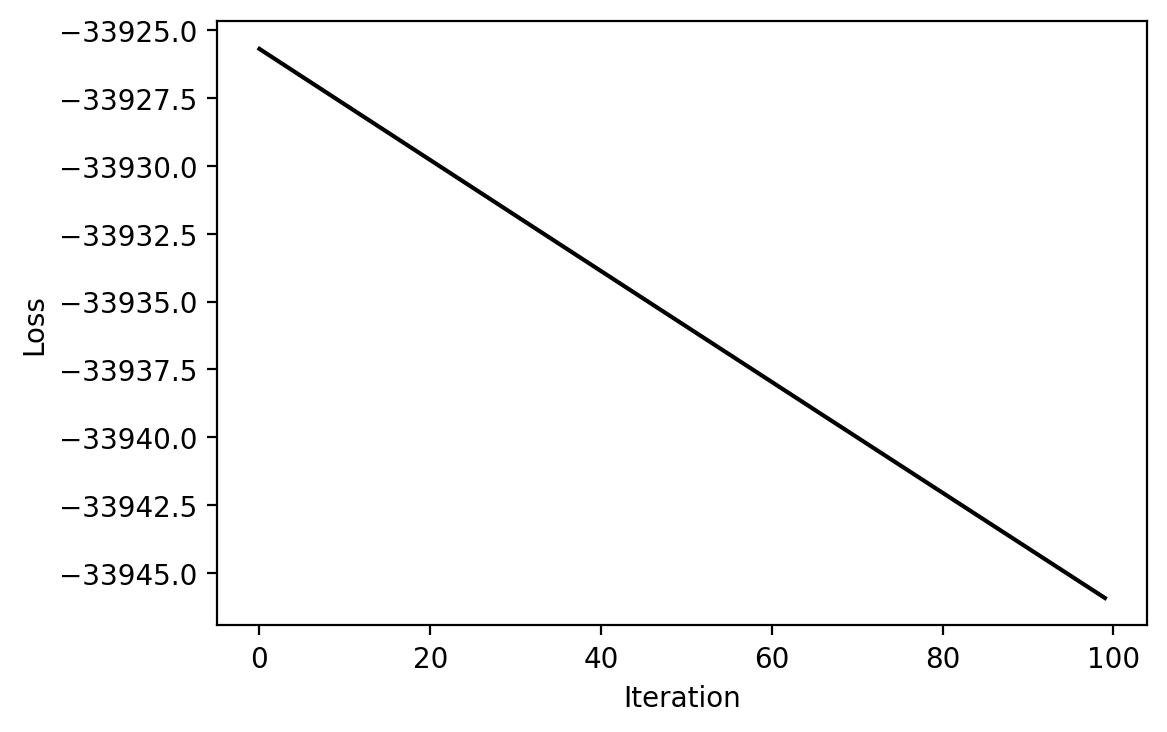

In [27]:
plt.figure()
plt.plot(iva.loss, color='black')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### 自然勾配法IVA

#### IVAの実行

In [39]:
np.random.seed(111)
iva = NaturalGradLaplaceIVA()

In [40]:
Y = iva(X, iteration=500)

#### 分離音

In [41]:
_, y = ss.istft(Y, nperseg=fft_size, noverlap=fft_size-hop_size)
y = y[:, :T]

In [42]:
for idx in range(n_sources):
    display(ipd.Audio(y[idx], rate=sr))

Output hidden; open in https://colab.research.google.com to view.

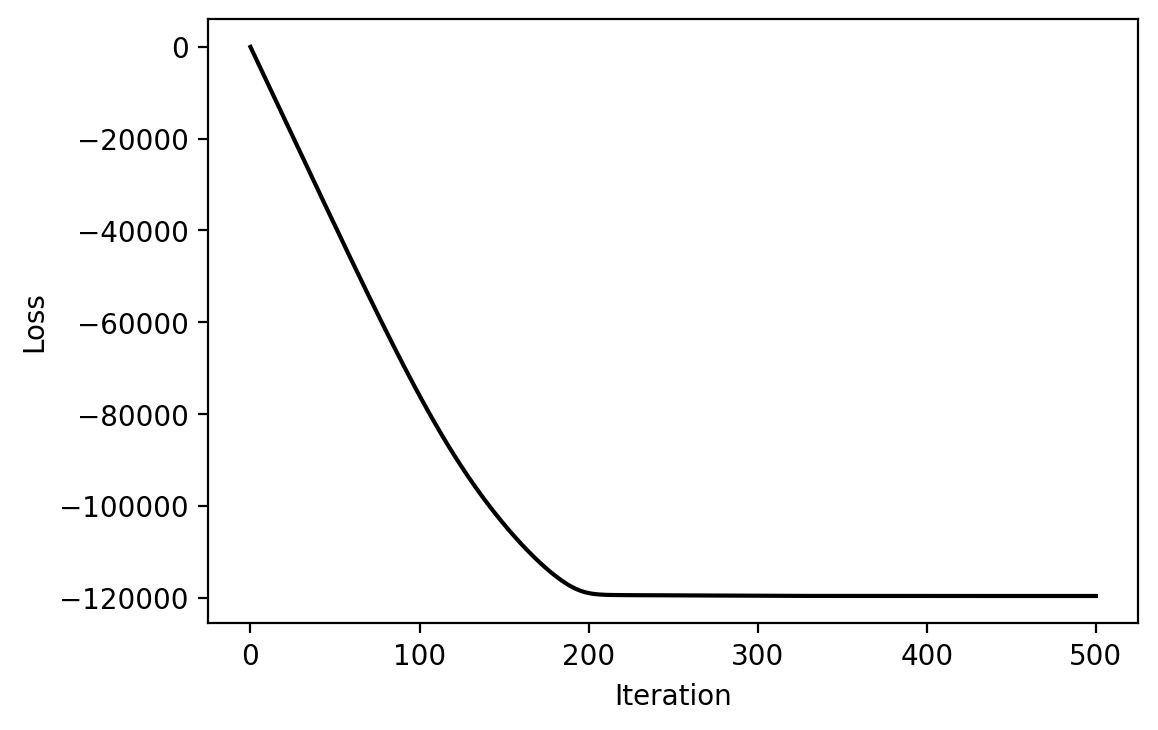

In [43]:
plt.figure()
plt.plot(iva.loss, color='black')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## 2 話者分離

### 話者分離のためのデータの準備
[CMU ARCTICデータベース](http://www.festvox.org/cmu_arctic/)の音声，および[Multi-Channel Impulse Response Database](https://www.iks.rwth-aachen.de/en/research/tools-downloads/databases/multi-channel-impulse-response-database/)のインパルス応答を用いて，多チャネルの混合音をシミュレーションする．

In [ ]:
%%shell
. ./prepare.sh

窓長などについて
- $T_{60}=160$ [ms]の残響のインパルス応答を使用する．
- 空間がランク$1$である仮定から，フーリエ変換の窓長は，$4096$サンプル（$=256$ [ms]）としている．
- シフト長は，窓長の半分の$2048$サンプルとしている

In [ ]:
fft_size, hop_size = 4096, 2048

In [ ]:
aew_mic3, sr = sf.read("./data/cmu_us_aew_arctic/trimmed/convolved-16000_deg60-mic3.wav")
axb_mic3, sr = sf.read("./data/cmu_us_axb_arctic/trimmed/convolved-16000_deg300-mic3.wav")
x_mic3 = aew_mic3 + axb_mic3

aew_mic4, sr = sf.read("./data/cmu_us_aew_arctic/trimmed/convolved-16000_deg60-mic4.wav")
axb_mic4, sr = sf.read("./data/cmu_us_axb_arctic/trimmed/convolved-16000_deg300-mic4.wav")
x_mic4 = aew_mic4 + axb_mic4

x = np.vstack([x_mic3, x_mic4])
n_sources, T = x.shape
n_channels = n_sources

### インパルス応答畳み込み後の音

In [ ]:
display(ipd.Audio(aew_mic3, rate=sr))
display(ipd.Audio(axb_mic3, rate=sr))

### 混合音

In [ ]:
for idx in range(n_channels):
    display(ipd.Audio(x[idx], rate=sr))

### IVAの実行

In [ ]:
_, _, X = ss.stft(x, nperseg=fft_size, noverlap=fft_size-hop_size)

In [ ]:
np.random.seed(111)
iva = NaturalGradLaplaceIVA()

In [ ]:
Y = iva(X, iteration=500)

In [ ]:
_, y = ss.istft(Y, nperseg=fft_size, noverlap=fft_size-hop_size)
y = y[:,:T]

### 分離音

In [ ]:
for idx in range(n_sources):
    ipd.Audio(y[idx], rate=sr)

In [ ]:
plt.figure()
plt.plot(iva.loss, color='black')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()